In [1]:
#import 套件
#import 資料
#特徵工程
#train ==> logic regression, svm ...
#提交

In [2]:
#套件
import pandas as pd
import numpy as np
import random as rnd

#繪圖
import matplotlib.pyplot as plt
import seaborn as sns

#演算法
from sklearn.linear_model import LogisticRegression

In [3]:
#from google.colab import files
#uploaded=files.upload()

In [4]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')
combine=[train_df,test_df]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


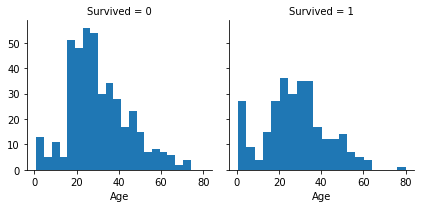

In [9]:
g=sns.FacetGrid(train_df,col="Survived")
g.map(plt.hist,"Age",bins=20)

In [10]:
train_df['Hasbin']=train_df["Cabin"].apply(lambda x:0 if type(x) == float else 1)
test_df['Hasbin']=test_df["Cabin"].apply(lambda x:0 if type(x) == float else 1)

In [11]:
train_df=train_df.drop(["Ticket","Cabin"],axis=1)
test_df=test_df.drop(["Ticket","Cabin"],axis=1)
combine=[train_df,test_df]

In [12]:
for dataset in combine:
  dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)
pd.crosstab(train_df['Title'],train_df['Sex']).sort_values(by=["male","female"],ascending=False)

Sex,female,male
Title,,
Mr,0,517
Master,0,40
Dr,1,6
Rev,0,6
Col,0,2
Major,0,2
Capt,0,1
Don,0,1
Jonkheer,0,1


In [13]:
for dataset in combine:
  dataset["Title"]=dataset["Title"].replace(['Lady','Countess','Dona'],"Rare_Female")
  dataset["Title"]=dataset["Title"].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],"Rare_Male")
  dataset["Title"]=dataset["Title"].replace(['Mlle','Ms','Mme'],"Miss")
train_df[["Title","Survived"]].groupby(["Title"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Title,Survived
4,Rare_Female,1.000000
3,Mrs,0.792000
1,Miss,0.704301
0,Master,0.575000
5,Rare_Male,0.285714
2,Mr,0.156673


In [14]:
title_mapping={"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare_Female":5,"Rare_Male":6}
for dataset in combine:
  dataset['Title']=dataset['Title'].map(title_mapping)
  dataset['Title']=dataset['Title'].fillna(0)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Hasbin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1


In [15]:
train_df=train_df.drop(["Name","PassengerId"],axis=1)
test_df=test_df.drop(["Name"],axis=1)
combine=[train_df,test_df]

In [16]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Hasbin,Title
0,0,3,male,22.0,1,0,7.2500,S,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,3
2,1,3,female,26.0,0,0,7.9250,S,0,2
3,1,1,female,35.0,1,0,53.1000,S,1,3
4,0,3,male,35.0,0,0,8.0500,S,0,1


In [17]:
for dataset in combine:
  dataset['Sex']=dataset['Sex'].map({"female":1,"male":0}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Hasbin,Title
0,0,3,0,22.0,1,0,7.2500,S,0,1
1,1,1,1,38.0,1,0,71.2833,C,1,3
2,1,3,1,26.0,0,0,7.9250,S,0,2
3,1,1,1,35.0,1,0,53.1000,S,1,3
4,0,3,0,35.0,0,0,8.0500,S,0,1


In [18]:
guess_ages = np.zeros((6,3))
for dataset in combine:
    # 取6种组合的中位数
    for i in range(0, 6):        
        for j in range(0, 3):
            guess_title_df = dataset[dataset["Title"]==i+1]["Age"].dropna()            
            guess_df = dataset[(dataset['Title'] == i+1) & (dataset['Pclass'] == j+1)]['Age'].dropna()            
            age_guess = guess_df.median() if ~np.isnan(guess_df.median()) else guess_title_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    # 给满足6中情况的Age字段赋值
    for i in range(0, 6):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Title == i+1) & (dataset.Pclass == j+1),
                        'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Hasbin,Title
0,0,3,0,22,1,0,7.2500,S,0,1
1,1,1,1,38,1,0,71.2833,C,1,3
2,1,3,1,26,0,0,7.9250,S,0,2
3,1,1,1,35,1,0,53.1000,S,1,3
4,0,3,0,35,0,0,8.0500,S,0,1


In [19]:
for dataset in combine:
  dataset.loc[dataset["Age"]>12,"IsChildren"]=0
  dataset.loc[dataset["Age"]<=12,"IsChildren"]=1
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Hasbin,Title,IsChildren
0,0,3,0,22,1,0,7.2500,S,0,1,0.0
1,1,1,1,38,1,0,71.2833,C,1,3,0.0
2,1,3,1,26,0,0,7.9250,S,0,2,0.0
3,1,1,1,35,1,0,53.1000,S,1,3,0.0
4,0,3,0,35,0,0,8.0500,S,0,1,0.0


In [20]:
train_df["AgeBand"]=pd.qcut(train_df["Age"],8)
train_df[["AgeBand","Survived"]].groupby(["AgeBand"],as_index=False).mean()

,AgeBand,Survived
0,"(-0.001, 17.0]",0.538462
1,"(17.0, 21.0]",0.362903
2,"(21.0, 25.0]",0.393939
3,"(25.0, 26.0]",0.120370
4,"(26.0, 31.0]",0.414062
5,"(31.0, 36.5]",0.478261
6,"(36.5, 45.0]",0.388430
7,"(45.0, 80.0]",0.372549


In [21]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 17, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 21), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 21) & (dataset['Age'] <= 25), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 26), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 31), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 36.5), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 36.5) & (dataset['Age'] <= 45), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 7
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Hasbin,Title,IsChildren,AgeBand
0,0,3,0,2,1,0,7.2500,S,0,1,0.0,"(21.0, 25.0]"
1,1,1,1,6,1,0,71.2833,C,1,3,0.0,"(36.5, 45.0]"
2,1,3,1,3,0,0,7.9250,S,0,2,0.0,"(25.0, 26.0]"
3,1,1,1,5,1,0,53.1000,S,1,3,0.0,"(31.0, 36.5]"
4,0,3,0,5,0,0,8.0500,S,0,1,0.0,"(31.0, 36.5]"


In [22]:
train_df = train_df.drop(["AgeBand"],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Hasbin,Title,IsChildren
0,0,3,0,2,1,0,7.2500,S,0,1,0.0
1,1,1,1,6,1,0,71.2833,C,1,3,0.0
2,1,3,1,3,0,0,7.9250,S,0,2,0.0
3,1,1,1,5,1,0,53.1000,S,1,3,0.0
4,0,3,0,5,0,0,8.0500,S,0,1,0.0


In [23]:
for dataset in combine:
    dataset["FamilySize"] = dataset["Parch"] + dataset["SibSp"] + 1
train_df[["FamilySize","Survived"]].groupby(["FamilySize"],as_index = False).mean().sort_values(by="FamilySize",ascending=True)

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [24]:
for dataset in combine:
    dataset["IsAlone"] = 0
    dataset.loc[dataset["FamilySize"] == 1,"IsAlone"] = 1
train_df[["IsAlone","Survived"]].groupby(["IsAlone"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [25]:
train_df = train_df.drop(["Parch","SibSp"],axis=1)
test_df = test_df.drop(["Parch","SibSp"],axis=1)
combine = [train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Hasbin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,2,7.2500,S,0,1,0.0,2,0
1,1,1,1,6,71.2833,C,1,3,0.0,2,0
2,1,3,1,3,7.9250,S,0,2,0.0,1,1
3,1,1,1,5,53.1000,S,1,3,0.0,2,0
4,0,3,0,5,8.0500,S,0,1,0.0,1,1


In [26]:
freq_port = train_df["Embarked"].dropna().mode()[0]
freq_port

'S'

In [27]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].fillna(freq_port)
train_df[["Embarked","Survived"]].groupby(["Embarked"],as_index=False).mean().sort_values(by="Survived",ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [28]:
for dataset in combine:
    dataset["Embarked"] = dataset["Embarked"].map({"S":0,"C":1,"Q":2}).astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Hasbin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,2,7.2500,0,0,1,0.0,2,0
1,1,1,1,6,71.2833,1,1,3,0.0,2,0
2,1,3,1,3,7.9250,0,0,2,0.0,1,1
3,1,1,1,5,53.1000,0,1,3,0.0,2,0
4,0,3,0,5,8.0500,0,0,1,0.0,1,1


In [29]:
test_df["Fare"].fillna(test_df["Fare"].dropna().median(),inplace=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
Fare           418 non-null float64
Embarked       418 non-null int32
Hasbin         418 non-null int64
Title          418 non-null int64
IsChildren     418 non-null float64
FamilySize     418 non-null int64
IsAlone        418 non-null int64
dtypes: float64(2), int32(3), int64(6)
memory usage: 31.1 KB


In [30]:
train_df["FareBand"] = pd.qcut(train_df["Fare"],4)
train_df[["FareBand","Survived"]].groupby(["FareBand"],as_index=False).mean().sort_values(by="FareBand",ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [31]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Hasbin,Title,IsChildren,FamilySize,IsAlone
0,0,3,0,2,0,0,0,1,0.0,2,0
1,1,1,1,6,3,1,1,3,0.0,2,0
2,1,3,1,3,1,0,0,2,0.0,1,1
3,1,1,1,5,3,0,1,3,0.0,2,0
4,0,3,0,5,1,0,0,1,0.0,1,1
5,0,3,0,3,1,2,0,1,0.0,1,1
6,0,1,0,7,3,0,1,1,0.0,1,1
7,0,3,0,0,2,0,0,4,1.0,5,0
8,1,3,1,4,1,0,0,3,0.0,3,0
9,1,2,1,0,2,1,0,3,0.0,2,0


In [32]:
train_df.info()
print("_"*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int32
Age           891 non-null int32
Fare          891 non-null int32
Embarked      891 non-null int32
Hasbin        891 non-null int64
Title         891 non-null int64
IsChildren    891 non-null float64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
dtypes: float64(1), int32(4), int64(6)
memory usage: 62.7 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
Fare           418 non-null int32
Embarked       418 non-null int32
Hasbin         418 non-null int64
Title          418 non-null int64
IsChildren     418 non-null float64
FamilySize     

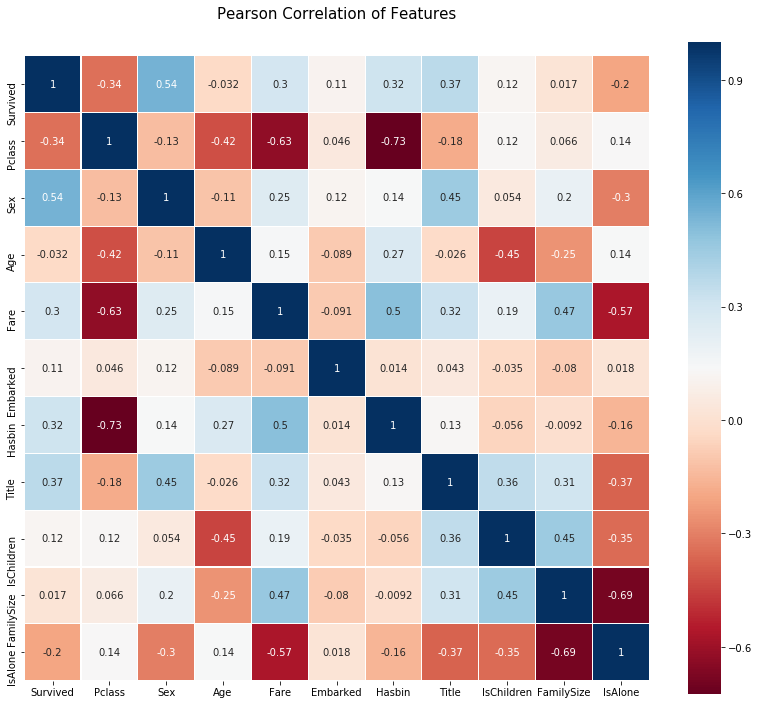

In [33]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [34]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId",axis=1).copy()

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred_logreg = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
acc_log

81.82

In [36]:
import time
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_logreg
    })
submission.to_csv('submission_logisticRegression'
                  +".csv", 
                  index=False)
#files.download('submission_logisticRegression.csv')

In [37]:
#gaussiannb
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred_clf = clf.predict(X_test)
acc_clf = round(clf.score(X_train,Y_train)*100,2)
acc_clf

78.68

In [38]:
import time
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_logreg
    })
submission.to_csv('submission_gaussianNB'
                  +".csv", 
                  index=False)

In [39]:
for dataset in combine:
    dataset['IsChildren']=dataset['IsChildren'].astype('int')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null int32
Fare           418 non-null int32
Embarked       418 non-null int32
Hasbin         418 non-null int64
Title          418 non-null int64
IsChildren     418 non-null int32
FamilySize     418 non-null int64
IsAlone        418 non-null int64
dtypes: int32(5), int64(6)
memory usage: 27.8 KB


In [40]:
X_train = train_df.drop("Survived",axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("PassengerId",axis=1).copy()

In [41]:
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim=10, batch_size=1))
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mse','acc'])

Using TensorFlow backend.


In [42]:
#model.load_weights('weight')
#model.get_weights()

In [43]:
# 训练模型，以 32 个样本为一个 batch 进行迭代
model.fit(X_train, Y_train, epochs=100, batch_size=1)
classes = model.predict(X_test, batch_size=1)
classes

Epoch 1/100


InternalError: Blas GEMV launch failed:  m=10, n=1
	 [[Node: dense_1/MatMul = MatMul[T=DT_FLOAT, _class=["loc:@training/RMSprop/gradients/dense_1/MatMul_grad/MatMul_1"], transpose_a=false, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:GPU:0"](_arg_dense_1_input_0_0/_17, dense_1/kernel/read)]]
	 [[Node: metrics/acc/Mean_1/_57 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_223_metrics/acc/Mean_1", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

In [ ]:
model.get_weights()
model.save_weights('weight')

In [ ]:
classes=np.around(classes).astype(int)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": classes.T[0]
    })
#submission.to_csv('submissionk'
#                  +".csv", 
#                  index=False)
#files.download('submission.csv')